In [1]:
import numpy as np
from utils import JPtools as jpt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.cross_validation import train_test_split
%matplotlib inline
%config InlineBackend.figure_formats=['svg']


Using TensorFlow backend.
/Users/eliasrubin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Couldn't import dot_parser, loading of dot files will not be possible.


/Users/eliasrubin/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from sklearn.decomposition import PCA
from sklearn import datasets

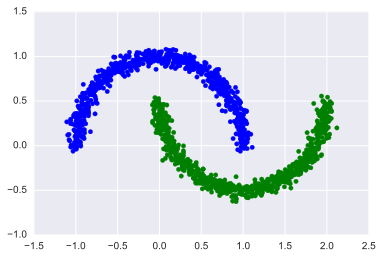

In [12]:
noisy_moons = datasets.make_moons(n_samples = 1500, noise = 0.05)

X, y = noisy_moons
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.figure()
plt.scatter(X[:,0], X[:,1], color = colors[y].tolist())
plt.show()
    
    

In [42]:
greens = y == 1
blues = y == 0

In [26]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [27]:
X_pca = pca.transform(X)
X_back = pca.inverse_transform(X_pca)

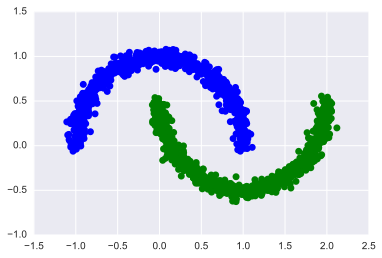

In [28]:
plt.figure()
plt.plot(X_back[greens, 0], X_back[greens, 1], 'go')
plt.plot(X_back[blues, 0], X_back[blues, 1], 'bo')
plt.show()

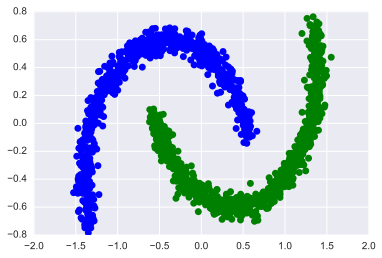

In [29]:
plt.figure()
plt.plot(X_pca[greens, 0], X_pca[greens,1], 'go')
plt.plot(X_pca[blues, 0], X_pca[blues, 1], 'bo')
plt.show()

In [74]:
%%capture
jae = jpt.JPAutoEncoder([2, 2, 2, 2, 2, 2, 2])
jae.pretrain(X_train)
jae.fine_train(X_train, num_epoch = 600)

In [75]:
X_pred = jae.predict(X_train)
X_pred = X_pred.reshape(1500,2)

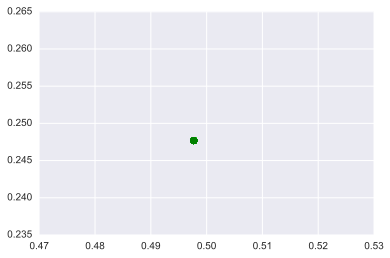

In [77]:
plt.figure()
plt.plot(X_pred[greens, 0], X_pred[greens, 1], 'go', alpha = 0.2)
plt.plot(X_pred[blues, 0], X_pred[blues, 1], 'bo', alpha = 0.2)
plt.show()

In [65]:
xgreens = X[greens,:].reshape(750,2)
xblues = X[blues, :].reshape(750, 2)

In [70]:
X_train = np.vstack((xgreens, xblues))

In [ ]:
from sklearn.datasets import fetch_20newsgroups

ngtrain = fetch_20newsgroups(subset = 'train')